In [4]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_data = '/content/drive/MyDrive/drive/10LoaiTraiCay/TRAIN'
test_data =  '/content/drive/MyDrive/drive/10LoaiTraiCay/TEST'
val_data  =  '/content/drive/MyDrive/drive/10LoaiTraiCay/TEST'

In [10]:
from keras.engine.data_adapter import train_validation_split

In [11]:
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 387 images belonging to 10 classes.
Found 107 images belonging to 10 classes.
Found 107 images belonging to 10 classes.


In [12]:
class_name = ['CAM', 'CÀ RỐT', 'CHUỐI', 'MÃNG CẦU', 'MẬN', 'NHÃN', 'ỔI', 'SẦU RIÊNG', 'TÁO','XOÀI']

In [13]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại trai cay: ",train_input.num_classes)

labels:  ['CAM', 'CÀ RỐT', 'CHUỐI', 'MÃNG CẦU', 'MẬN', 'NHÃN', 'ỔI', 'SẦU RIÊNG', 'TÁO', 'XOÀI']
match class:  {'CAM': 0, 'CÀ RỐT': 1, 'CHUỐI': 2, 'MÃNG CẦU': 3, 'MẬN': 4, 'NHÃN': 5, 'ỔI': 6, 'SẦU RIÊNG': 7, 'TÁO': 8, 'XOÀI': 9}
Tổng cộng các loại trai cay:  10


In [14]:
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [15]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
fruit_train = model.fit(train_input,batch_size=30,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
13/13 [==============================] - 64s 5s/step - loss: 3.5617 - accuracy: 0.1085 - val_loss: 2.2939 - val_accuracy: 0.0935
Epoch 2/50
13/13 [==============================] - 3s 230ms/step - loss: 2.2389 - accuracy: 0.1938 - val_loss: 2.2117 - val_accuracy: 0.1215
Epoch 3/50
13/13 [==============================] - 3s 232ms/step - loss: 2.0107 - accuracy: 0.2661 - val_loss: 1.9713 - val_accuracy: 0.2150
Epoch 4/50
13/13 [==============================] - 3s 225ms/step - loss: 1.8623 - accuracy: 0.2532 - val_loss: 1.9127 - val_accuracy: 0.1963
Epoch 5/50
13/13 [==============================] - 3s 245ms/step - loss: 1.7890 - accuracy: 0.3023 - val_loss: 1.9487 - val_accuracy: 0.1495
Epoch 6/50
13/13 [==============================] - 3s 228ms/step - loss: 1.6572 - accuracy: 0.3101 - val_loss: 1.8302 - val_accuracy: 0.2991
Epoch 7/50
13/13 [==============================] - 3s 229ms/step - loss: 1.6018 - accuracy: 0.3385 - val_loss: 1.7972 - val_accuracy: 0.2991
Epoch 8/

In [18]:
model.save('/content/drive/MyDrive/drive/10LoaiTraiCay/FRUIT.h5')

array([0])

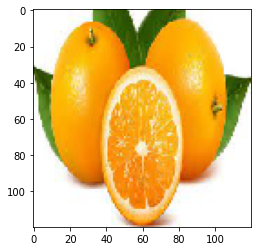

In [20]:
pic = image.load_img('/content/Cam.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [21]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai trai cay: CAM")
if guess[0]==1:
  print("Loai trai cay: CA ROT")
if guess[0]==2:
  print("Loai trai cay: CHUOI")
if guess[0]==3:
  print("Loai trai cay: MANG CAU")
if guess[0]==4:
  print("Loai trai cay: MAN")
if guess[0]==5:
  print("Loai trai cay: NHAN")
if guess[0]==6:
  print("Loai trai cay: OI")
if guess[0]==7:
  print("Loai trai cay: SAU RIENG")
if guess[0]==8:
  print("Loai trai cay: TAO")
if guess[0]==9:
  print("Loai trai cay: XOAI")

Loai trai cay: CAM
